In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
%matplotlib inline 

In [53]:
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [54]:
cars_df = pd.read_csv("cars-dataset.csv") 

In [55]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [56]:
# drop the car name column as it is useless for the model
cars_df = cars_df.drop('car name', axis=1)

In [57]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [58]:
cars_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [59]:
# HP column is missing the describe output which indicates something is not right with the column

In [60]:
#Check if the hp column contains anything other than digits 
temp = pd.DataFrame(cars_df.hp.str.isdigit())
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [61]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replacing them with "nan"
cars_df = cars_df.replace('?', np.nan)

In [62]:
cars_df[cars_df.isnull().any(axis=1)]

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,NaN,2046,19.0,71,25.0
126,6,200.0,NaN,2875,17.0,74,21.0
330,4,85.0,NaN,1835,17.3,80,40.9
336,4,140.0,NaN,2905,14.3,80,23.6
354,4,100.0,NaN,2320,15.8,81,34.5
374,4,151.0,NaN,3035,20.5,82,23.0


In [63]:
# Dropping these values as replacing them with either median or mean may not do justice to the clustering and 
# put them in the wrong cluster

In [64]:
cars_df = cars_df.dropna()

In [65]:
cars_df.dtypes

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [66]:
# Converting data type of hp column to floater to reflect the true data type

In [67]:
cars_df['hp'] = cars_df['hp'].astype('float64')

In [68]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


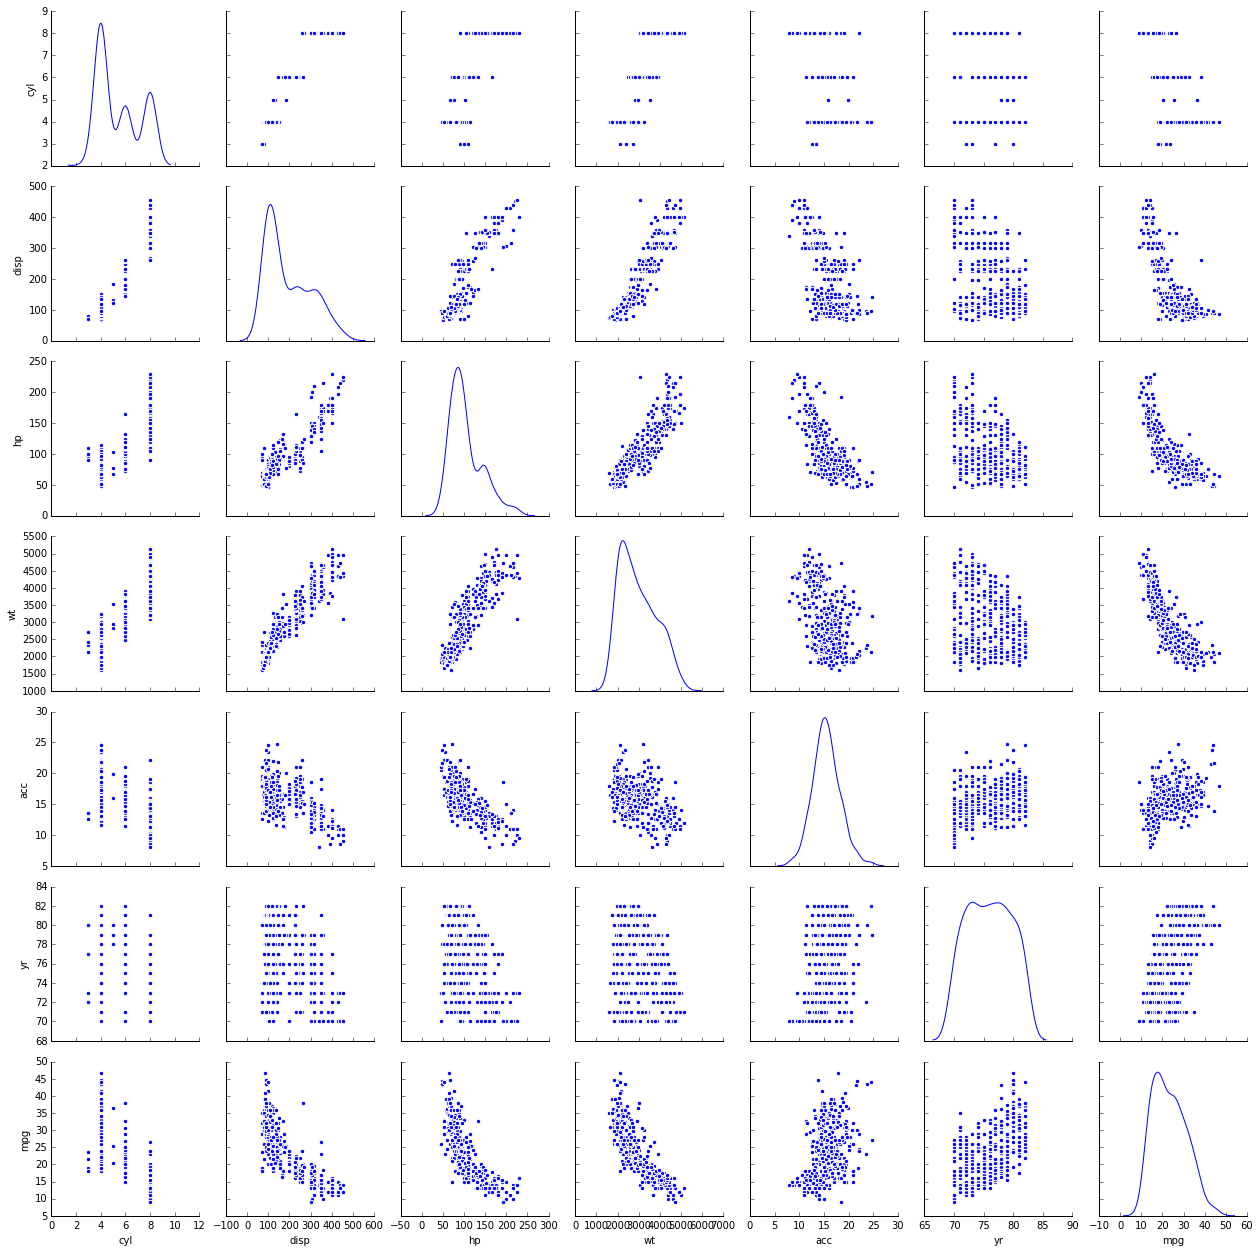

In [69]:
sns.pairplot(cars_df, diag_kind='kde')

In [94]:
# From the above pairplots, looking at the diagnol KDE graphs it looks there can be 3 clusters

In [71]:
from scipy.stats import zscore
cars_df_st=cars_df.apply(zscore)

In [73]:
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cars_df_st)
    prediction=model.predict(cars_df_st)
    meanDistortions.append(sum(np.min(cdist(cars_df_st, model.cluster_centers_, 'euclidean'), axis=1)) / cars_df_st.shape[0])

Text(0.5,1,'Selecting k with the Elbow Method')

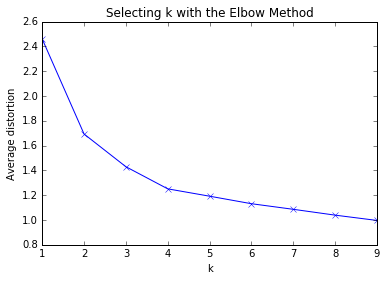

In [74]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [75]:
# From the above graph lets look at 2, 3 and 4 clusters

In [76]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(cars_df_st)
prediction=final_model.predict(cars_df_st)

In [77]:
#Append the prediction 
cars_df_st["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5D0AA0F60>,
      dtype=object)

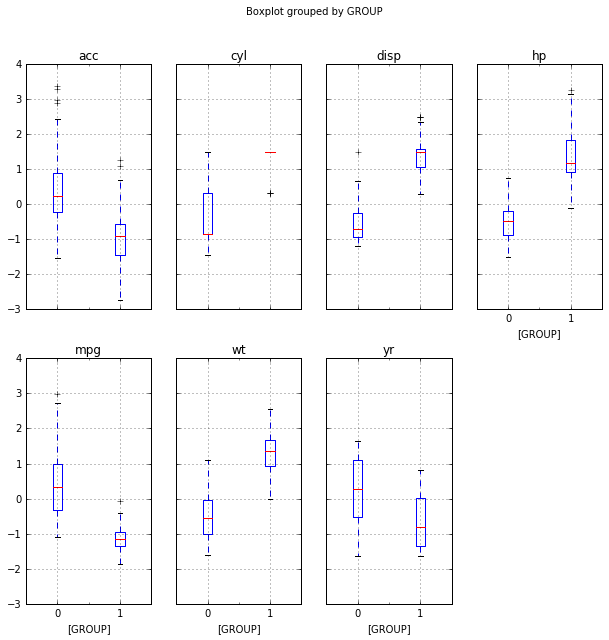

In [80]:
# Analysing the distribution
cars_df_st.boxplot(by = 'GROUP',  layout=(2,4), figsize=(10, 10))

In [81]:
# Outliers can be seen in Group 0. Hence trying k =3
final_model=KMeans(3)
final_model.fit(cars_df_st)
prediction=final_model.predict(cars_df_st)

In [82]:
#Append the prediction 
cars_df_st["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5D110B160>,
      dtype=object)

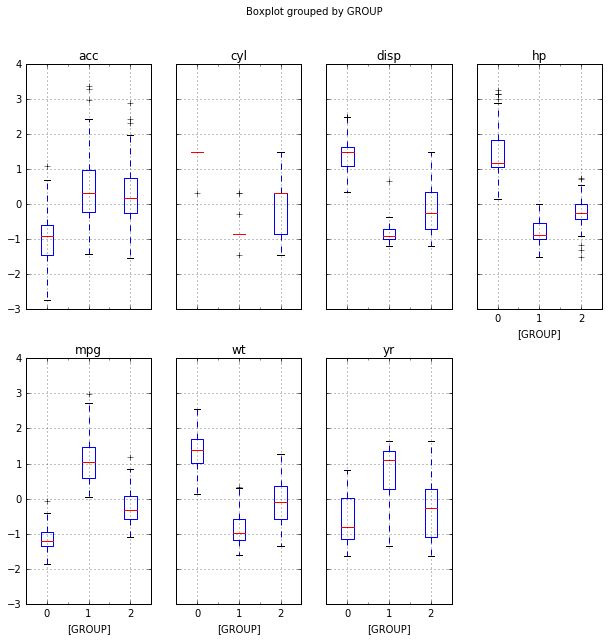

In [83]:
# Analysing the distribution
cars_df_st.boxplot(by = 'GROUP',  layout=(2,4), figsize=(10, 10))

In [90]:
# Checking with k =4
final_model=KMeans(4)
final_model.fit(cars_df_st)
prediction=final_model.predict(cars_df_st)

In [91]:
#Append the prediction 
cars_df_st["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5D36E57F0>,
      dtype=object)

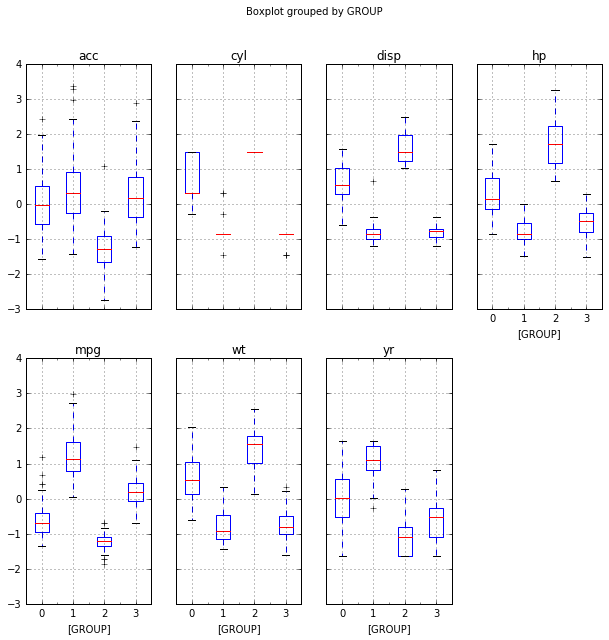

In [92]:
# Analysing the distribution
cars_df_st.boxplot(by = 'GROUP',  layout=(2,4), figsize=(10, 10))

In [133]:
#From the above box plots and the Pair plot going with 3 clusters

In [95]:
final_model=KMeans(3)
final_model.fit(cars_df_st)
prediction=final_model.predict(cars_df_st)

In [96]:
#Append the prediction 
cars_df_st["GROUP"] = prediction
cars_df["GROUP"] = prediction

In [97]:
cars_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,8,307.0,130.0,3504,12.0,70,18.0,0
1,8,350.0,165.0,3693,11.5,70,15.0,0
2,8,318.0,150.0,3436,11.0,70,18.0,0
3,8,304.0,150.0,3433,12.0,70,16.0,0
4,8,302.0,140.0,3449,10.5,70,17.0,0


In [102]:
# Seperating the three clusters into three different data clusters

cars_df_0 = cars_df[cars_df["GROUP"] == 0]
cars_df_1 = cars_df[cars_df["GROUP"] == 1]
cars_df_2 = cars_df[cars_df["GROUP"] == 2]

In [106]:
cars_df_0.shape

(59, 8)

In [107]:
cars_df_1.shape

(206, 8)

In [108]:
cars_df_2.shape

(127, 8)

In [113]:
# Separating attributes and dependent variable in the three groups

X_train_0 = cars_df_0.iloc[:,0:5]
Y_train_0 = cars_df_0.iloc[:,6]
X_train_1 = cars_df_1.iloc[:,0:5]
Y_train_1 = cars_df_1.iloc[:,6]
X_train_2 = cars_df_2.iloc[:,0:5]
Y_train_2 = cars_df_2.iloc[:,6]

In [120]:
regression_model = LinearRegression()

In [128]:
# Group 0
regression_model.fit(X_train_0, Y_train_0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
for idx, col_name in enumerate(X_train_0.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cyl is 0.0
The coefficient for disp is -0.0003880966757784506
The coefficient for hp is -0.028689001536842593
The coefficient for wt is -0.0011225049819209329
The coefficient for acc is -0.5315507735654302


In [129]:
# Group 1
regression_model.fit(X_train_1, Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
for idx, col_name in enumerate(X_train_1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cyl is 5.0130135215682445
The coefficient for disp is -0.011958039257663733
The coefficient for hp is -0.2388700123708998
The coefficient for wt is -0.0013763659951561318
The coefficient for acc is -0.5256936390613012


In [131]:
# Group 2
regression_model.fit(X_train_2, Y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
for idx, col_name in enumerate(X_train_2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cyl is 0.7704661150729135
The coefficient for disp is -0.020064624121454457
The coefficient for hp is 0.01147510110427818
The coefficient for wt is -0.0038505601544593076
The coefficient for acc is 0.13539479883497135
